<a href="https://colab.research.google.com/github/dajley/Analyzing-Outliers-Research-Project/blob/main/Main_Dataset_with_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
#Exploring Dataset with Outliers
#Building ML Models on Dataset
#Code and Research by Dajanique Leysath

#**Install Libraries**

In [61]:
#For data manipulation and analysis
import pandas as pd

#For scientific computing
import numpy as np

#For interactive plots
#Pyplot function makes changes to figures
import matplotlib.pyplot as plt

#Creates attractive and statistical graphics
import seaborn as sns

In [62]:
#Used to split data into training and testing
from sklearn.model_selection import train_test_split

In [63]:
#For Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [64]:
#Makes a pipeline
from sklearn.pipeline import make_pipeline

In [65]:
#For Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

In [66]:
#For Support Vector Regression
from sklearn.svm import SVR

In [67]:
#For Linear Regression
from sklearn.linear_model import LinearRegression

In [68]:
#For Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

#**Dataset**

In [69]:
#Save CSV in dataframe
df_main = pd.read_csv('/content/drive/MyDrive/Datasets/main_with_outliers.csv')

#Lists first 10 rows
df_main.head(10)

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
0,104.9,60.9285,37.1985,49.0635,50.2490,50.8615,7.8580,23.1800,489.1580,0.1835,5.6170,1.3810,34.8855,46.0855
1,59.7,53.1395,31.8545,42.4970,47.2270,46.5050,9.8660,28.0395,447.4045,0.1910,5.8490,2.2715,30.7485,37.6335
2,43.0,60.1670,33.7200,46.9435,52.5145,51.8025,7.5750,23.9520,442.3180,0.2075,6.3380,2.1860,28.4045,44.6370
3,76.8,58.6490,32.1940,45.4220,52.1705,48.8195,8.3395,25.6365,488.8215,0.2055,6.2715,0.7400,30.5045,42.3990
4,94.9,57.2660,34.1885,45.7275,49.0000,47.4995,7.5190,23.1775,396.1995,0.1680,5.1335,2.2735,32.6630,42.4450
5,86.0,58.3285,35.0765,46.7025,48.8065,45.4195,9.1940,24.7650,456.0825,0.1945,5.9380,2.1310,33.8710,42.9830
6,41.0,60.0035,36.3370,48.1705,50.7070,49.0790,9.2575,26.7905,437.1370,0.1910,5.8270,2.0640,34.6745,45.1155
7,56.3,58.9080,36.4330,47.6710,50.7105,50.0910,0.9666,25.4040,457.8330,0.1955,5.9710,2.4680,35.6340,44.8530
8,27.5,65.3490,38.5995,51.9745,53.4775,50.5825,9.3970,24.6430,469.0270,0.2260,6.9170,2.9450,37.0325,49.8755
9,66.7,603.0650,37.1160,48.7115,49.7380,47.5380,10.4655,27.0440,418.6625,0.2105,6.4035,0.2695,33.2895,45.4505


##**Exploratory Data Analysis (EDA)**

In [70]:
#Shows general info
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Value               286 non-null    float64
 1   Avg Max Temp        286 non-null    float64
 2   Avg Min Temp        286 non-null    float64
 3   Avg Temp            286 non-null    float64
 4   Avg Bare Soil Temp  286 non-null    float64
 5   Avg Turf Soil Temp  286 non-null    float64
 6   Avg Wind Speed      286 non-null    float64
 7   Avg Max Wind Speed  286 non-null    float64
 8   Total Solar Rad     286 non-null    float64
 9   Avg Penman PET      286 non-null    float64
 10  Total Penman PET    286 non-null    float64
 11  Total Rainfall      286 non-null    float64
 12  Avg Dew Point       286 non-null    float64
 13  Avg Wind Chill      286 non-null    float64
dtypes: float64(14)
memory usage: 31.4 KB


In [71]:
#Shows the shape
df_main.shape

(286, 14)

In [72]:
#Checks for null values
df_main.isnull().sum()

,0
Value,0
Avg Max Temp,0
Avg Min Temp,0
Avg Temp,0
Avg Bare Soil Temp,0
Avg Turf Soil Temp,0
Avg Wind Speed,0
Avg Max Wind Speed,0
Total Solar Rad,0
Avg Penman PET,0


In [73]:
#Checks for unique values
df_main.nunique()

,0
Value,250
Avg Max Temp,205
Avg Min Temp,203
Avg Temp,203
Avg Bare Soil Temp,202
Avg Turf Soil Temp,205
Avg Wind Speed,198
Avg Max Wind Speed,198
Total Solar Rad,206
Avg Penman PET,142


##**Identifying Data Distribution**

**Descriptive Statistics**: Mean, Median, Standard Deviation, Skewness, and Kurtosis

The **mean** and **median** can help identify the central tendency of the data.

The **standard deviation** indicates how data points are disperced around the central value.

In [74]:
#Shows basic descriptive statistics
df_main.describe()

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,94.711538,67.560204,40.619966,54.220327,56.318528,53.298813,11.378281,28.812858,511.041068,0.223275,6.958245,2.177937,39.246424,50.490129
std,35.748752,71.160593,39.867773,56.735327,61.450905,58.333088,12.847519,31.674484,528.266306,0.213927,7.536020,2.803870,41.124466,56.417984
min,25.400000,5.195350,3.533450,4.537250,4.606650,4.265500,0.833950,2.452050,41.333400,0.014300,0.428450,0.079500,3.309200,4.198500
25%,66.300000,56.516500,33.652500,45.032250,46.244000,43.169750,8.975375,23.551125,427.624500,0.180500,5.515250,0.962500,32.197750,40.595000
50%,92.450000,59.756000,35.994500,47.660000,49.103000,46.533500,9.897500,25.138500,446.817000,0.202500,6.168250,1.635250,34.638000,44.264250
75%,120.625000,61.787000,38.082750,49.759500,51.857375,49.478750,10.670000,26.611125,475.534000,0.218875,6.689000,2.548000,36.446000,46.641875
max,198.000000,623.305000,351.240000,498.645000,528.510000,522.030000,132.530000,289.540000,4754.230000,2.220000,73.175000,30.010000,370.060000,507.080000


count = amount of rows

mean = average

std = standard deviation

min = minimum value

25% = lower quartile

50% = median

75% = upper quartile

max = maximum value

In [75]:
#Shows mean
df_main.mean()

,0
Value,94.711538
Avg Max Temp,67.560204
Avg Min Temp,40.619966
Avg Temp,54.220327
Avg Bare Soil Temp,56.318528
Avg Turf Soil Temp,53.298813
Avg Wind Speed,11.378281
Avg Max Wind Speed,28.812858
Total Solar Rad,511.041068
Avg Penman PET,0.223275


In [76]:
#Shows median
df_main.median()

,0
Value,92.45000
Avg Max Temp,59.75600
Avg Min Temp,35.99450
Avg Temp,47.66000
Avg Bare Soil Temp,49.10300
Avg Turf Soil Temp,46.53350
Avg Wind Speed,9.89750
Avg Max Wind Speed,25.13850
Total Solar Rad,446.81700
Avg Penman PET,0.20250


In [77]:
#Shows standard deviation
df_main.std()

,0
Value,35.748752
Avg Max Temp,71.160593
Avg Min Temp,39.867773
Avg Temp,56.735327
Avg Bare Soil Temp,61.450905
Avg Turf Soil Temp,58.333088
Avg Wind Speed,12.847519
Avg Max Wind Speed,31.674484
Total Solar Rad,528.266306
Avg Penman PET,0.213927


The **Skewness** measures the asymmetry of the data distribution.

The **Kurtosis** measures the peaakedness or flatness of the distribution.

If Skewness = 0, then **normal distribution**.

mean = median = mode

If Skewness > 0, then **negatively skewed** (or left skewed).

mean < median < mode

If Skewness < 0, then **positively skewed** (or right skewed).

mean > median > mode

In [78]:
#Calculates skew
df_main.skew()

,0
Value,0.318464
Avg Max Temp,7.275026
Avg Min Temp,7.219764
Avg Temp,7.290634
Avg Bare Soil Temp,7.273179
Avg Turf Soil Temp,7.298337
Avg Wind Speed,7.483772
Avg Max Wind Speed,7.299441
Total Solar Rad,7.282814
Avg Penman PET,7.505830


Kurtosis uses Fisher's definition & Excess Kurtosis uses Pearson's definition.

If Kurtosis = 3 or Excess Kurtosis = 0, then **mesokurtic**. (perfectly normal distribution)

If Kurtosis > 3 or Excess Kurtosis > 0, then **leptokurtic**. (sharp peak, heavy tails)

If Kurtosis < 3 or Excess Kurtosis < 0, then **playkurtic**. (flat peak, light tails)

In [79]:
#Calculates kurtosis
df_main.kurtosis()

,0
Value,-0.309842
Avg Max Temp,52.219673
Avg Min Temp,51.574280
Avg Temp,52.542291
Avg Bare Soil Temp,52.103534
Avg Turf Soil Temp,52.788890
Avg Wind Speed,57.193733
Avg Max Wind Speed,52.890620
Total Solar Rad,52.520906
Avg Penman PET,58.714098


In [80]:
#Shows correlations between features
df_main.corr()

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
Value,1.000000,0.013430,0.007144,-0.083690,-0.007210,-0.078259,-0.026738,0.041294,0.034275,-0.016015,-0.059272,0.028860,-0.064730,0.107953
Avg Max Temp,0.013430,1.000000,-0.017703,-0.009782,-0.006693,-0.009729,-0.011732,-0.014006,0.200057,0.116563,-0.004998,-0.072589,-0.011942,-0.002389
Avg Min Temp,0.007144,-0.017703,1.000000,0.177636,-0.014410,-0.031006,0.000063,-0.010533,-0.019928,-0.016238,-0.014214,-0.041857,-0.017514,-0.011369
Avg Temp,-0.083690,-0.009782,0.177636,1.000000,-0.007755,-0.008383,-0.002428,-0.011692,-0.036261,-0.002251,-0.018741,-0.041071,-0.013149,-0.025752
Avg Bare Soil Temp,-0.007210,-0.006693,-0.014410,-0.007755,1.000000,-0.003139,-0.013874,-0.013942,-0.012063,-0.005123,0.163645,-0.043848,-0.007823,-0.001908
Avg Turf Soil Temp,-0.078259,-0.009729,-0.031006,-0.008383,-0.003139,1.000000,-0.019679,-0.016152,-0.014634,-0.007892,-0.008199,-0.021493,-0.024915,-0.006500
Avg Wind Speed,-0.026738,-0.011732,0.000063,-0.002428,-0.013874,-0.019679,1.000000,0.003329,-0.008866,-0.033181,-0.009694,-0.015215,-0.021477,0.166422
Avg Max Wind Speed,0.041294,-0.014006,-0.010533,-0.011692,-0.013942,-0.016152,0.003329,1.000000,-0.034795,-0.015413,-0.012736,0.033347,-0.030212,-0.033345
Total Solar Rad,0.034275,0.200057,-0.019928,-0.036261,-0.012063,-0.014634,-0.008866,-0.034795,1.000000,0.001058,0.001797,-0.025403,-0.018159,-0.015120
Avg Penman PET,-0.016015,0.116563,-0.016238,-0.002251,-0.005123,-0.007892,-0.033181,-0.015413,0.001058,1.000000,-0.002470,-0.038782,-0.006556,-0.022980


##**Visualization**

Correlation strengths (direction does not matter):

Strong Correlation: x > 0.5

Moderate Correlation: 0.3 < x < 0.5

Weak Correlation: x < 0.3

Which features are most correlated with crop yield?

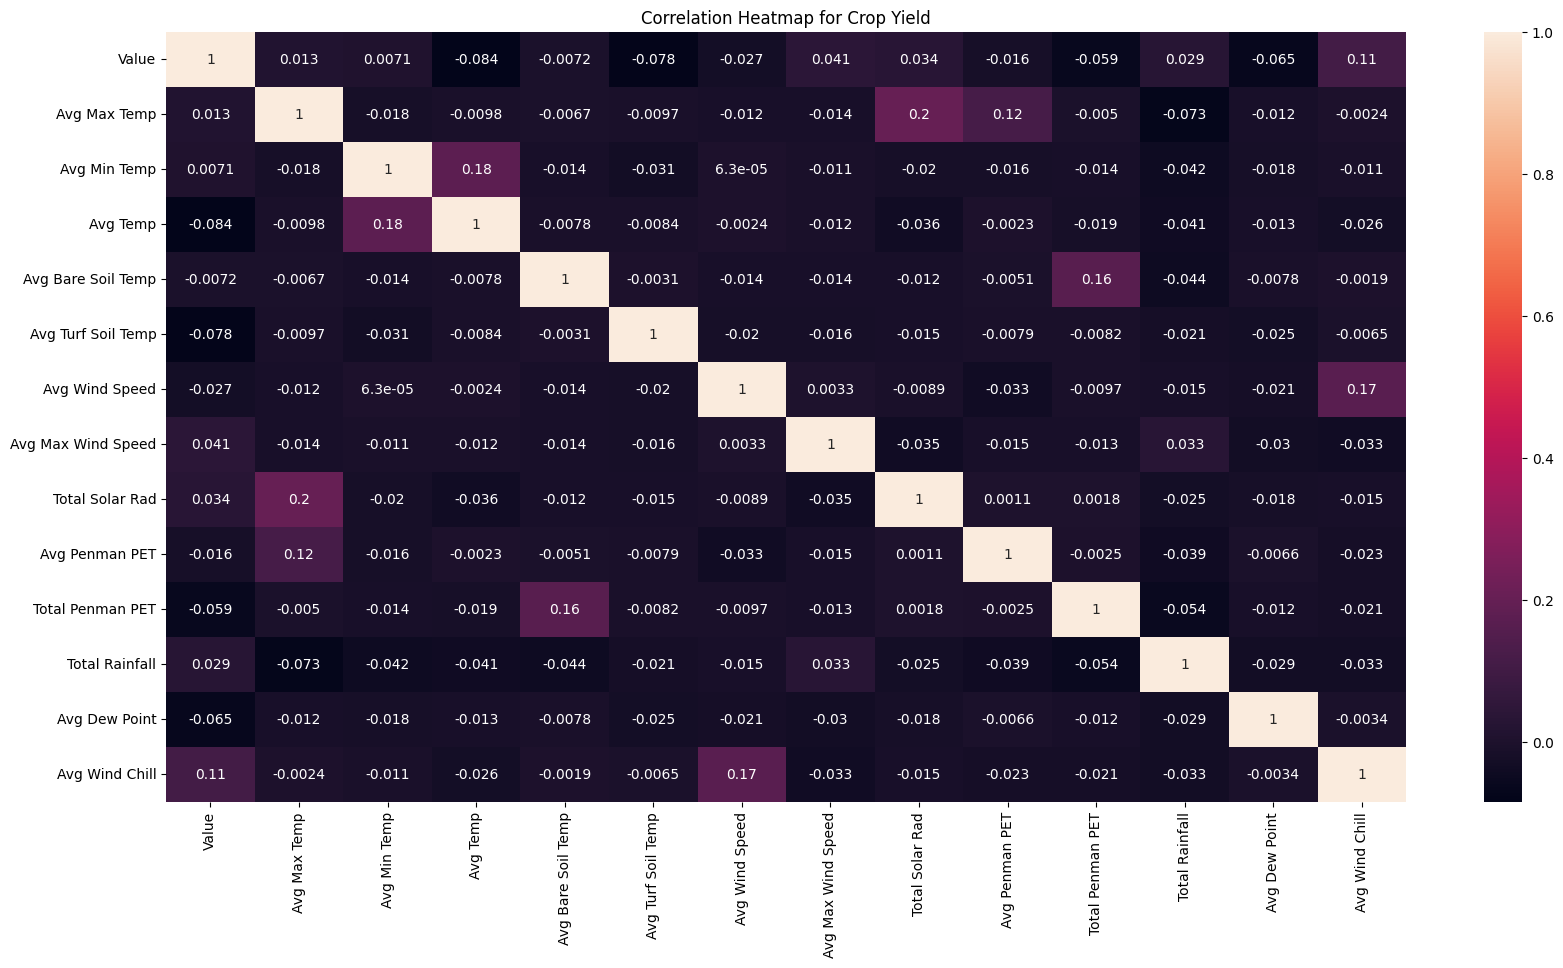

In [81]:
#Shows heatmap of correlation between features
sns.heatmap(df_main.corr(), annot=True)
plt.title("Correlation Heatmap for Crop Yield")
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

<Figure size 1000x1000 with 0 Axes>

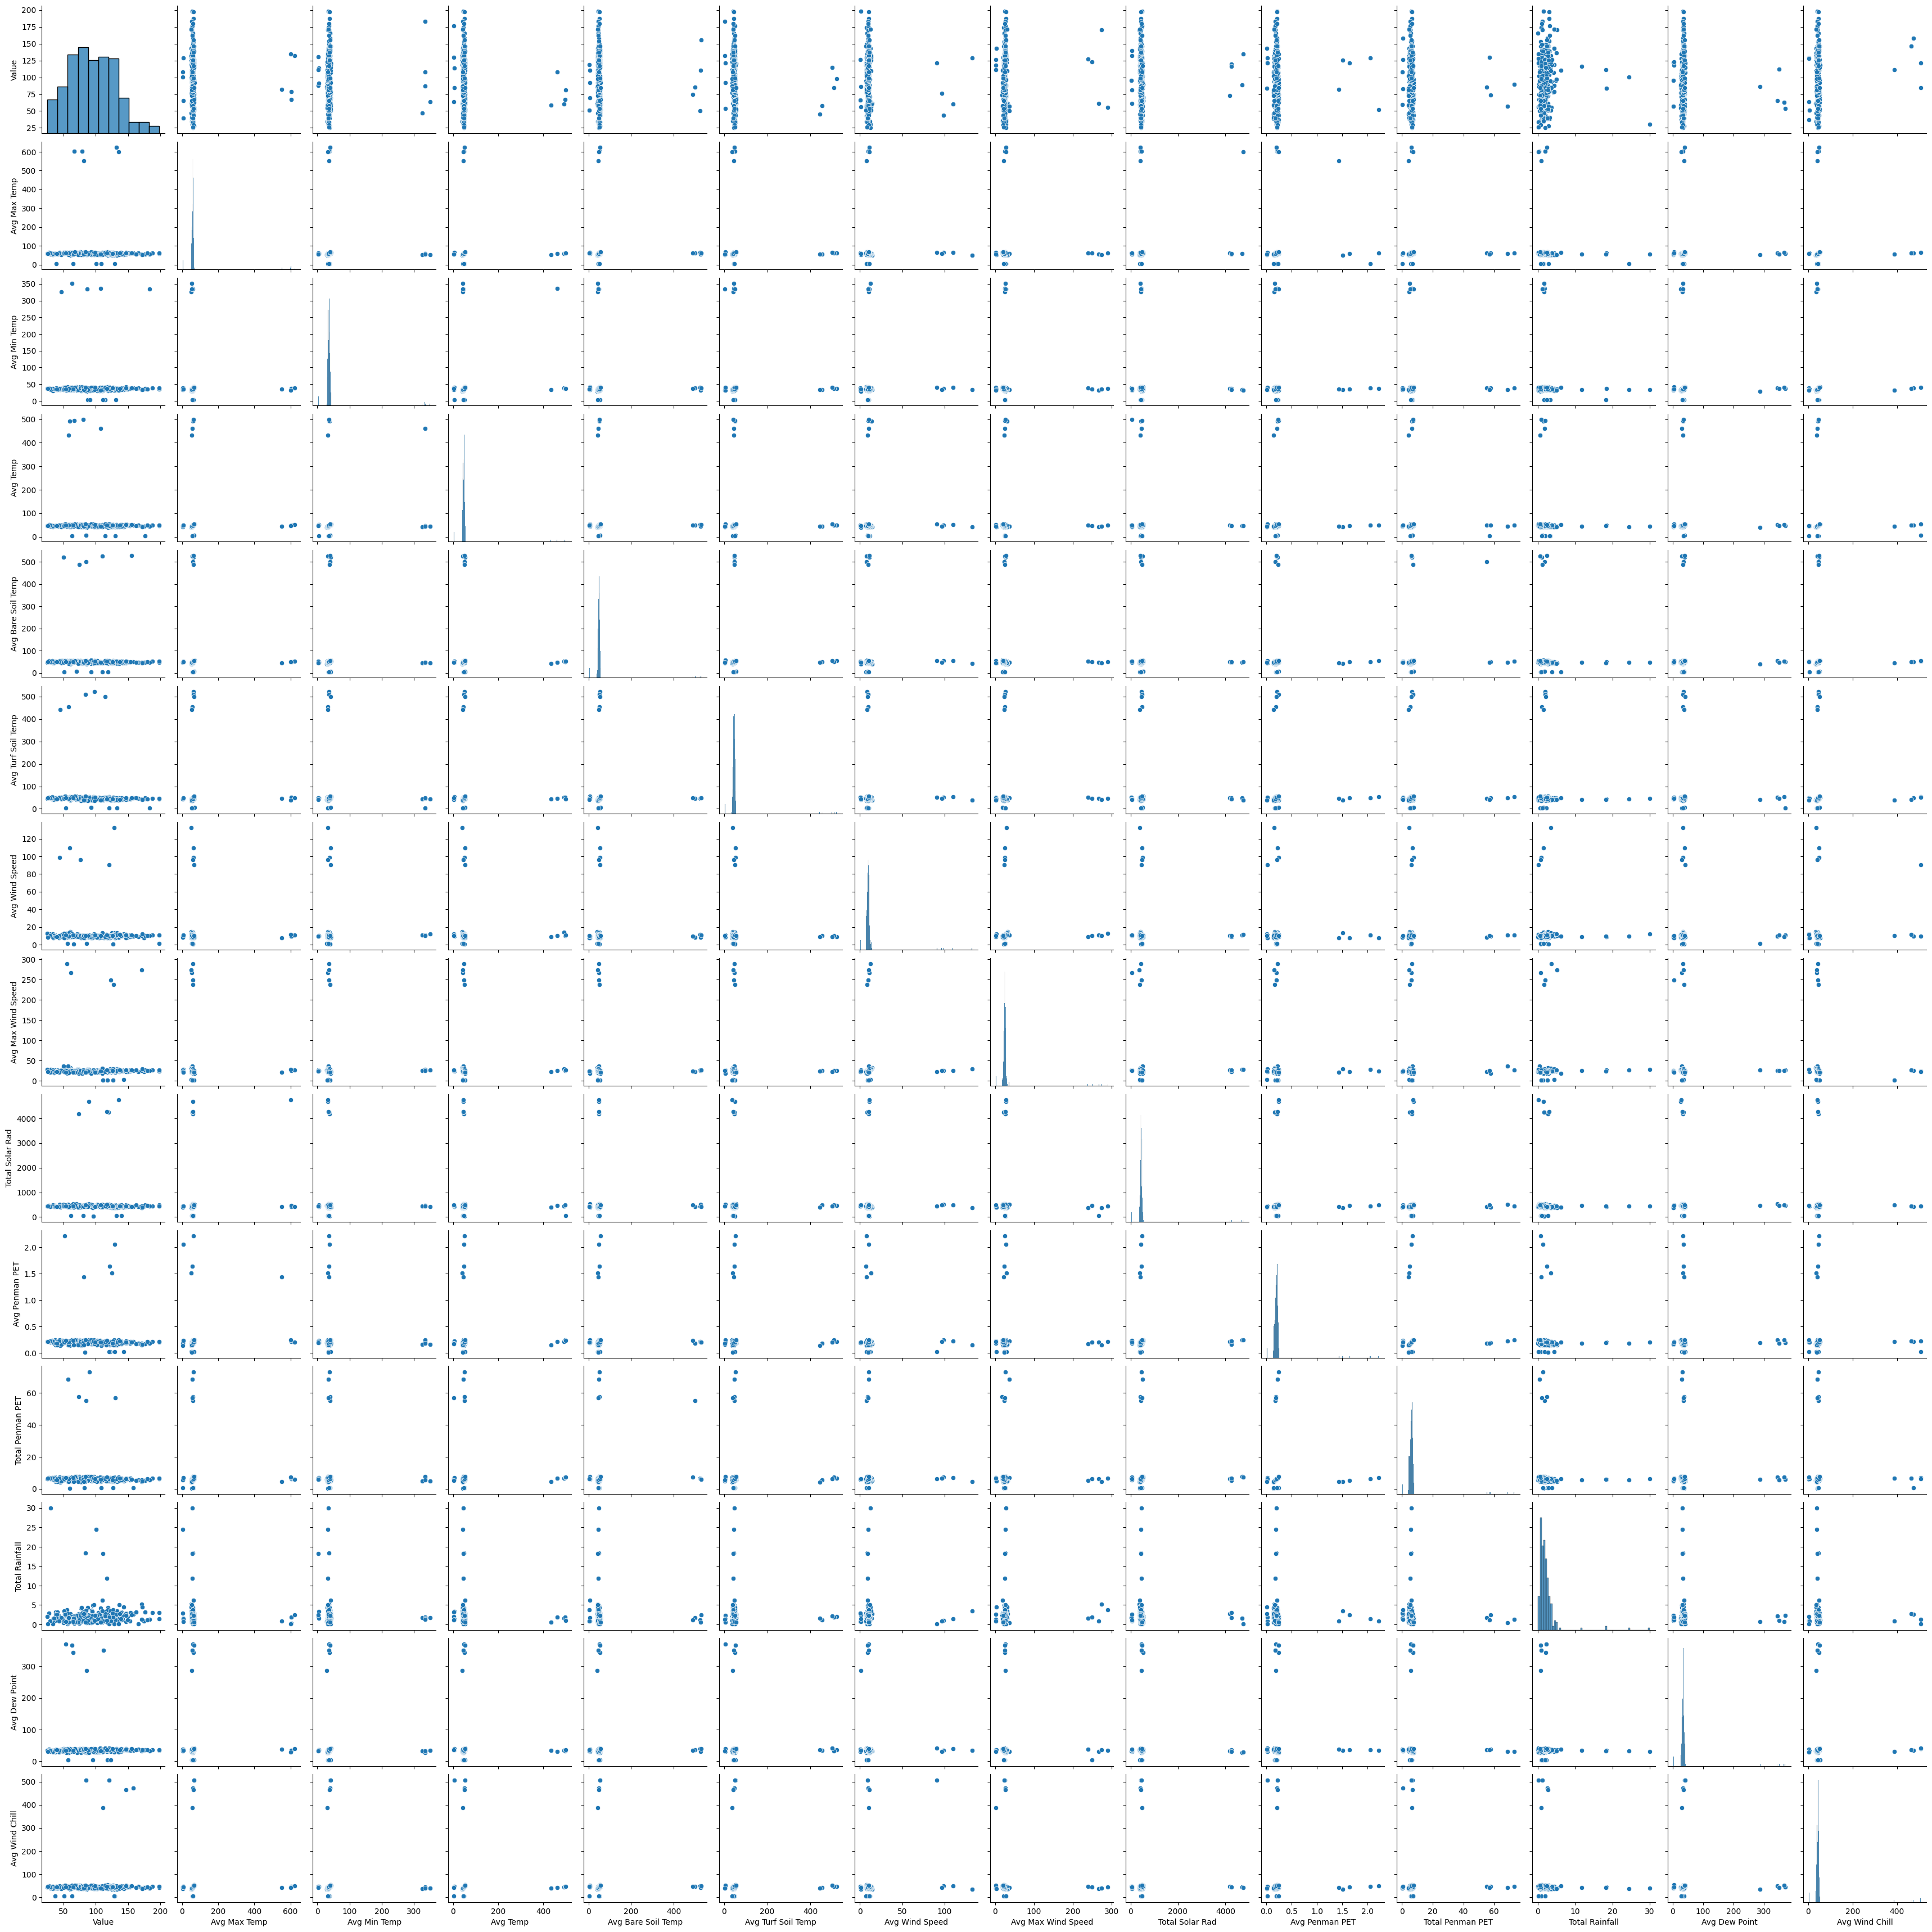

In [82]:
#Shows scatter plot of correlations between features
plt.figure(figsize=(10,10))
sns.pairplot(df_main)
plt.show()

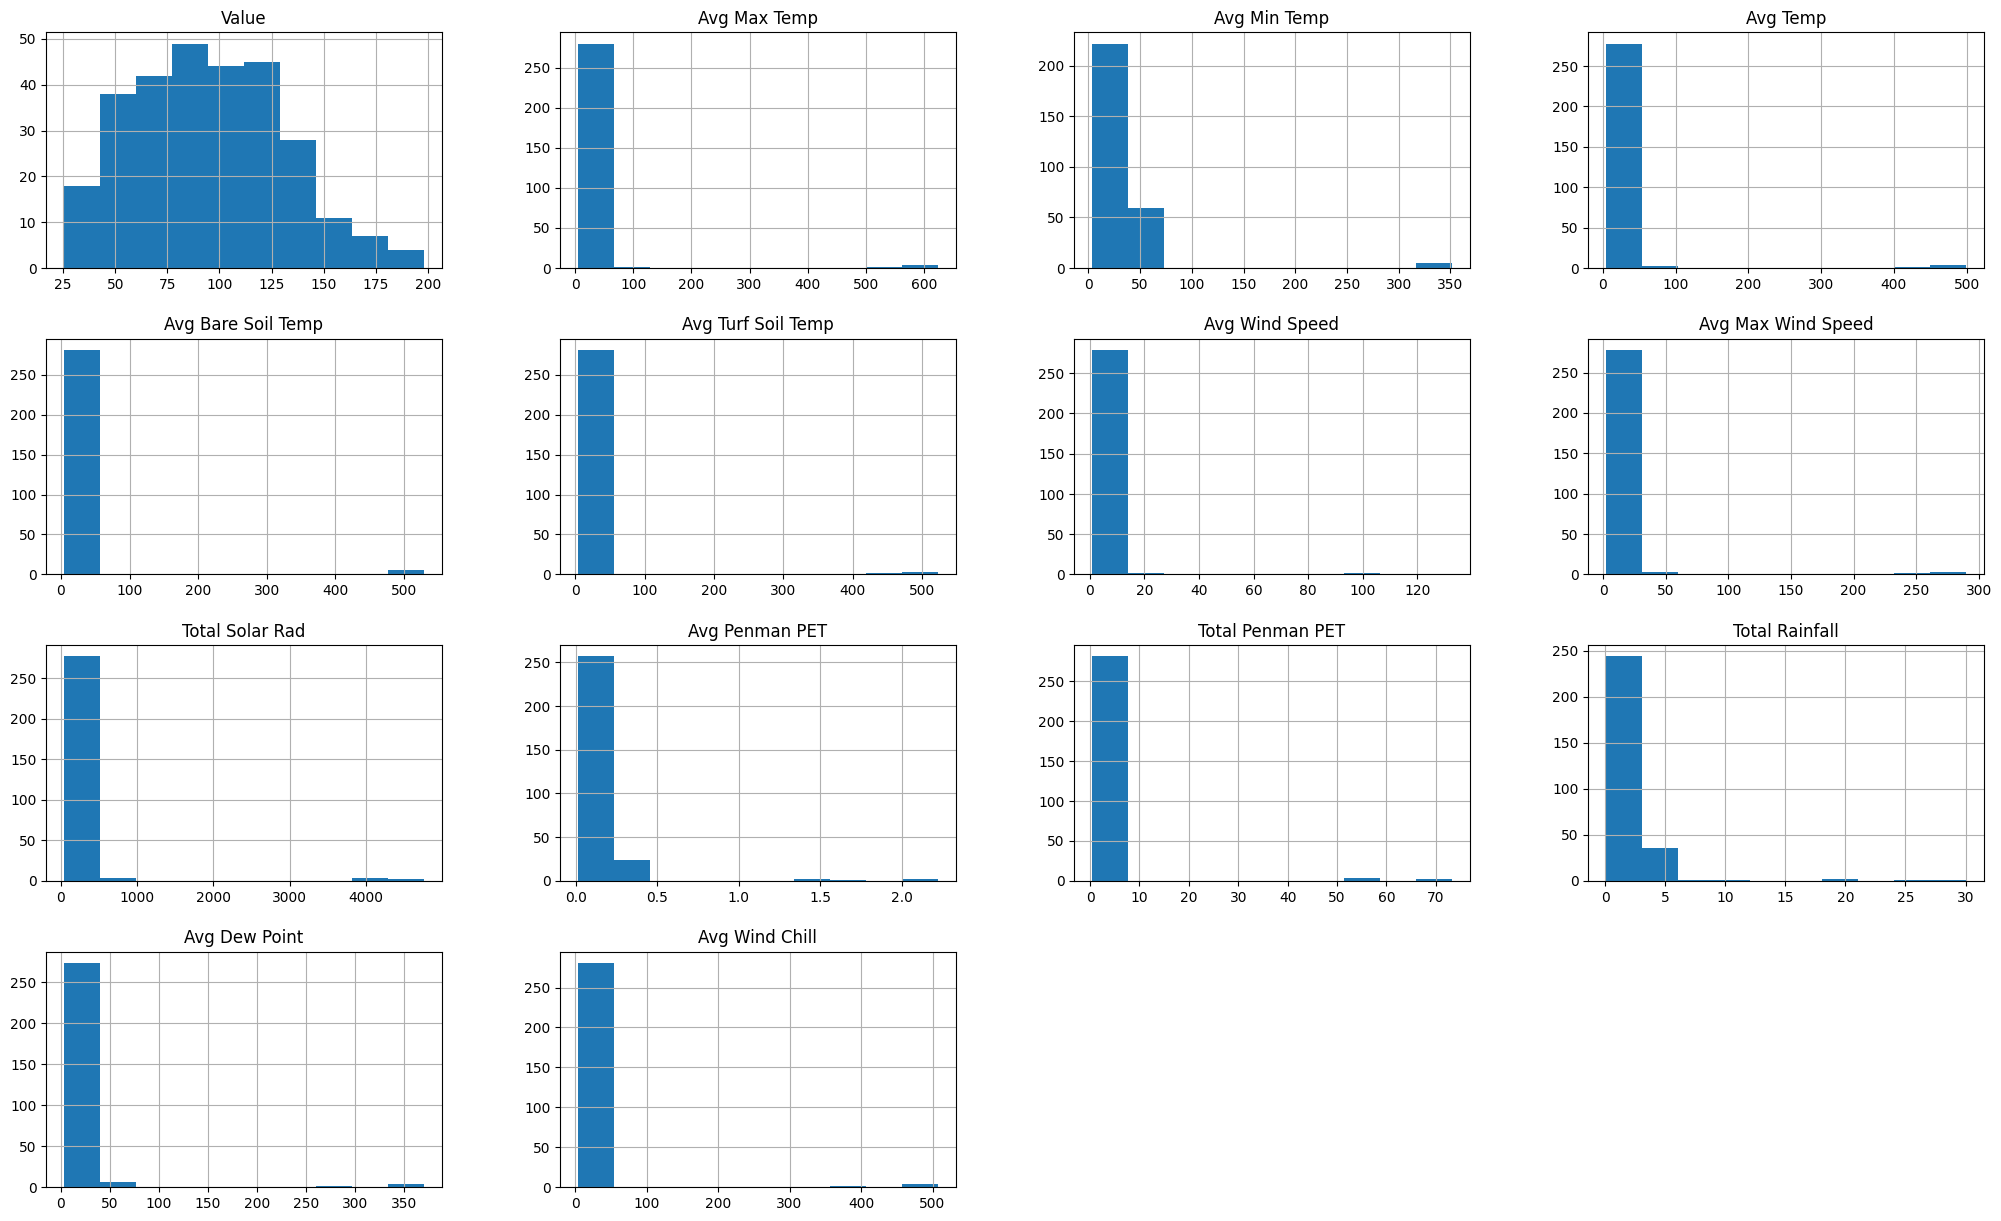

In [83]:
#Shows a histogram for each feature
df_main.hist(figsize=(25,15))
plt.show()

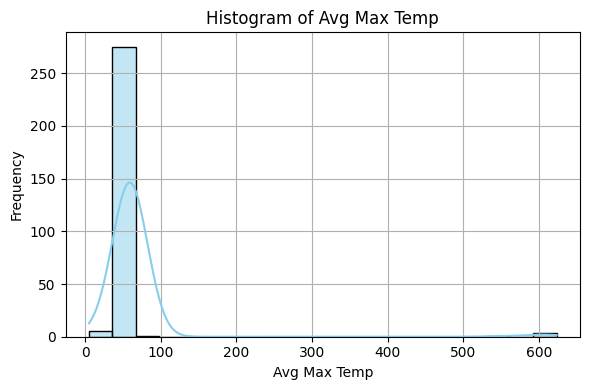

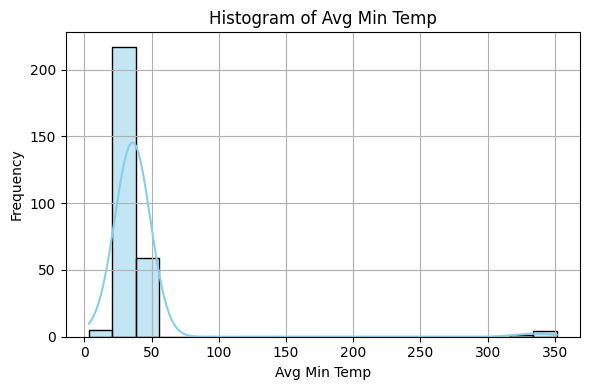

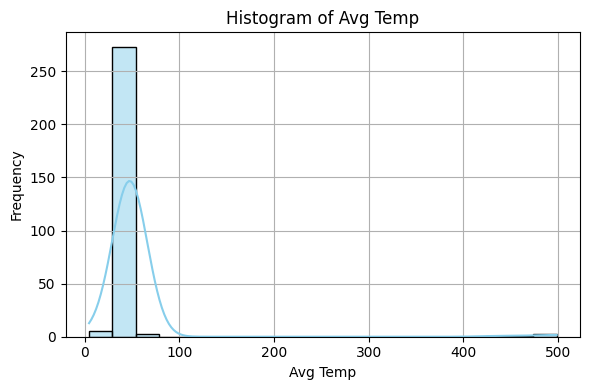

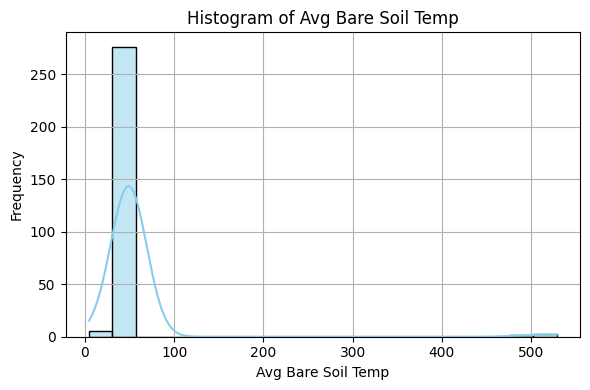

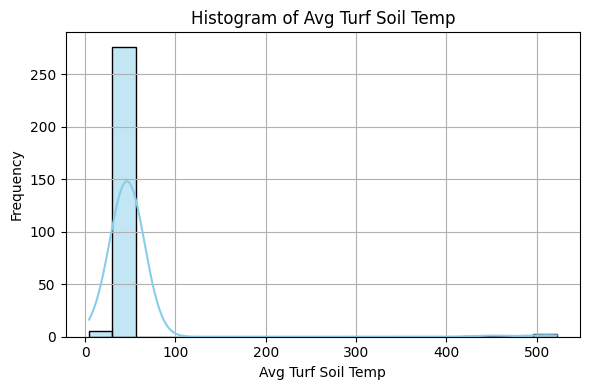

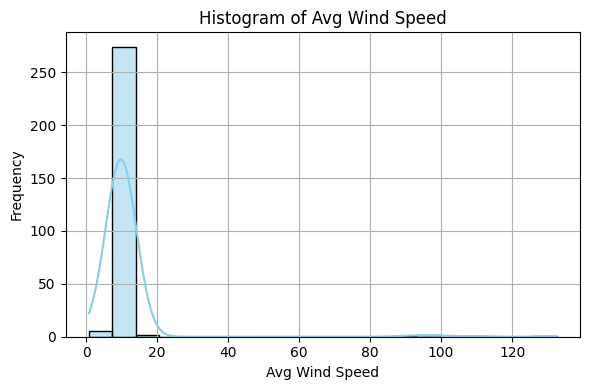

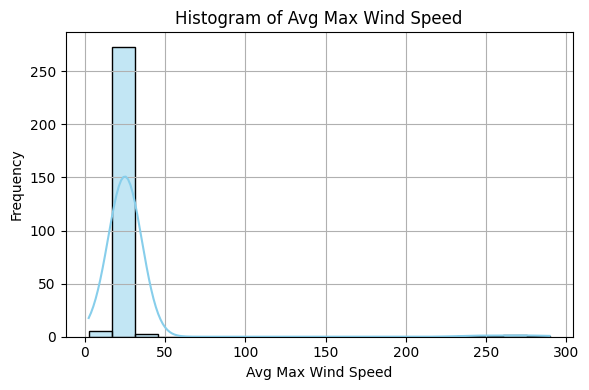

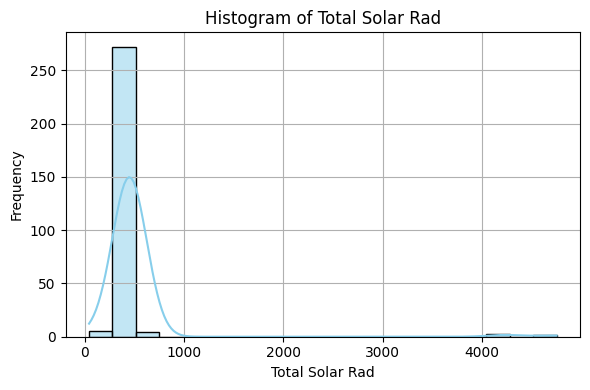

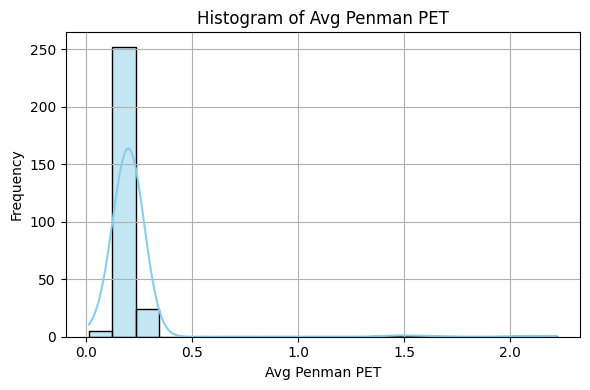

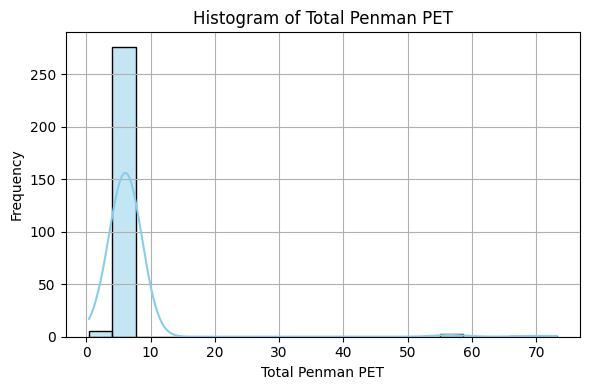

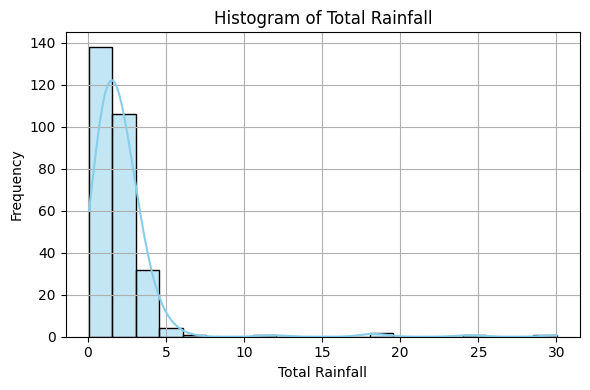

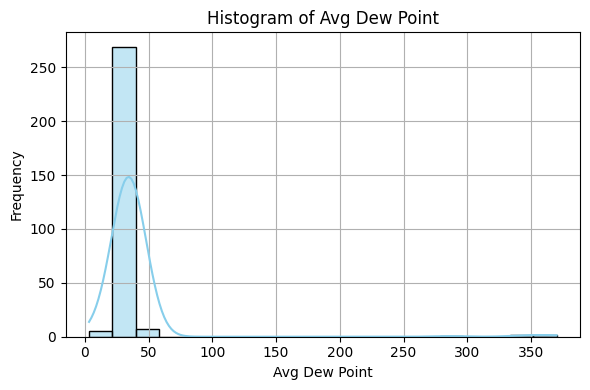

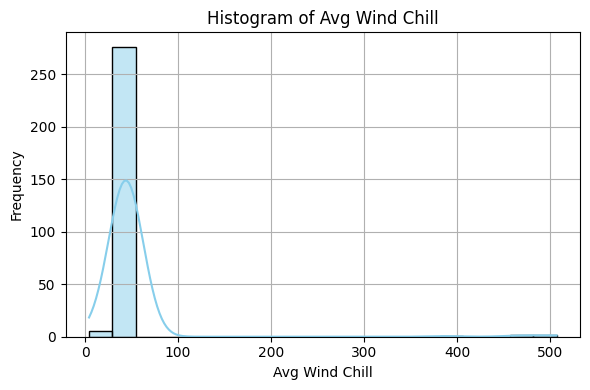

In [84]:
#Shows histogram for each feature compared to the target 'Value'
#Loop is used to go through each feature one by one
features = df_main.columns[1:14]
#features = df_main.columns[df_main.columns != 'Value']  --> excludes target column

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_main[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#**Data Pre-Processing**

##**Detecting Outliers**

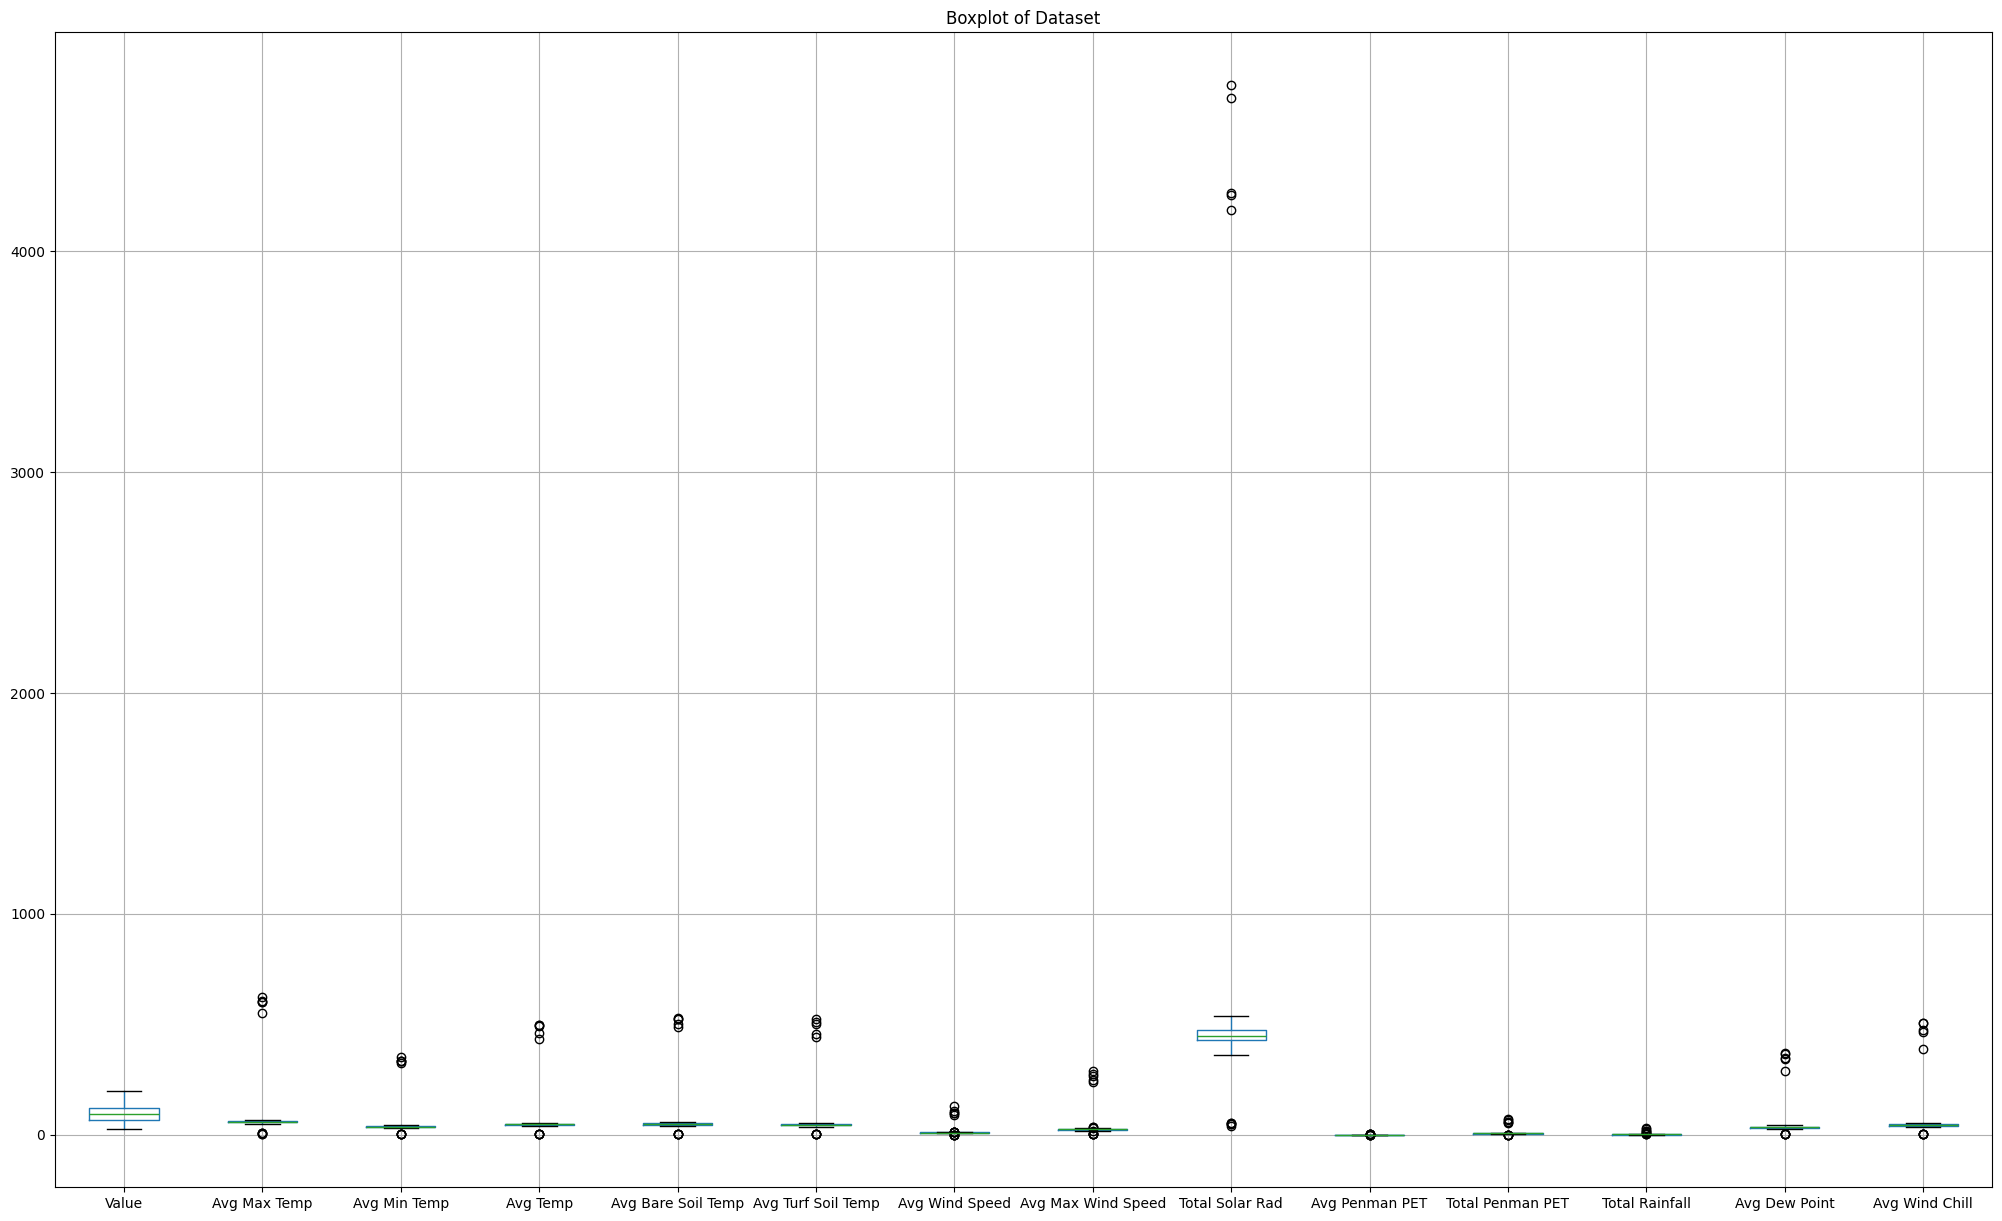

In [85]:
#Shows a boxplot of dataset to detect outliers visually
df_main.boxplot(figsize=(25,15))
plt.title('Boxplot of Dataset')
plt.show()

#**Data Preperation**

**Seperate data into X and Y**

In [86]:
#Define the target "Value" as y
y = df_main['Value']
y

,Value
0,104.9
1,59.7
2,43.0
3,76.8
4,94.9
...,...
281,117.1
282,39.7
283,65.1
284,98.6


In [87]:
#Define the features without the target "Value" as x
x = df_main.drop('Value', axis=1) #axis = 1 does column, axis = 0 does row
x

,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
0,60.92850,37.1985,49.0635,50.2490,50.8615,7.8580,23.1800,489.1580,0.1835,5.6170,1.3810,34.8855,46.0855
1,53.13950,31.8545,42.4970,47.2270,46.5050,9.8660,28.0395,447.4045,0.1910,5.8490,2.2715,30.7485,37.6335
2,60.16700,33.7200,46.9435,52.5145,51.8025,7.5750,23.9520,442.3180,0.2075,6.3380,2.1860,28.4045,44.6370
3,58.64900,32.1940,45.4220,52.1705,48.8195,8.3395,25.6365,488.8215,0.2055,6.2715,0.7400,30.5045,42.3990
4,57.26600,34.1885,45.7275,49.0000,47.4995,7.5190,23.1775,396.1995,0.1680,5.1335,2.2735,32.6630,42.4450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,62.73900,36.9900,49.8645,51.3840,42.9890,10.7280,26.8820,511.3620,0.2350,7.1915,0.9650,36.1970,47.0220
282,60.02550,35.2670,47.6465,48.9125,43.6705,8.9215,23.2990,427.6245,0.1820,5.5765,2.5450,36.7735,44.8625
283,6.20395,35.7990,48.9195,50.1140,47.6505,10.8985,21.7265,448.2195,0.2285,6.9955,0.7300,34.6885,44.7150
284,63.85200,40.2650,52.0590,52.7185,51.1560,10.7980,21.0045,418.0985,0.1990,6.0710,2.3815,40.1690,48.5900


**Split the data into training and testing**

In [88]:
#creates 4 variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [89]:
#shows 80% of data
x_train

,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
139,58.1885,34.3745,46.2820,50.2890,49.4465,10.1725,25.5455,482.9155,0.2170,6.6100,1.5275,31.0480,42.5615
25,64.1465,37.4505,50.7985,55.4535,54.3255,9.5945,26.1580,449.9430,0.2345,7.1585,1.9170,34.0605,48.5750
82,56.6120,36.2730,46.4430,46.2225,45.1465,10.6710,25.1600,464.4590,0.1800,5.5415,0.9500,349.8250,41.2925
144,59.0220,39.3410,49.1815,49.0625,49.0225,11.0530,25.8375,442.5125,0.1875,5.7260,3.6680,38.3950,45.3900
66,60.8520,37.4760,49.1640,51.6620,50.8285,10.2400,2.5440,399.7950,0.2070,6.3180,2.5950,34.6720,46.2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,55.1325,35.0595,45.0960,45.9585,44.3845,7.5575,22.2085,450.0720,0.1675,5.1315,0.8770,34.2910,42.2965
71,55.8675,31.6130,43.7405,44.7285,43.9295,10.3550,26.5920,476.5695,0.2145,6.5735,0.7845,28.7730,38.7750
106,58.3820,335.7950,459.8100,46.4845,45.0275,10.3880,25.6520,454.6380,0.2150,6.5705,1.8960,30.2990,42.2180
270,62.5815,37.4175,50.0000,48.9735,41.5925,11.4090,26.9345,439.4525,0.2210,6.7335,2.7450,35.5725,46.4770


In [90]:
#shape of x_train
x_train.shape

(228, 13)

In [91]:
#shows 20% of data
x_test

,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
9,603.06500,37.11600,48.7115,49.7380,47.5380,10.46550,27.0440,418.6625,0.2105,6.4035,0.2695,33.2895,45.4505
267,599.80500,31.92500,45.9530,49.6965,37.8085,11.29150,27.6480,4754.2300,0.2390,7.3115,0.1925,28.3810,41.9850
143,603.65000,36.60200,48.4840,50.4850,50.0335,9.65850,25.2500,460.6345,0.2165,6.6245,1.9300,33.8475,45.0510
212,551.45000,35.65350,45.3995,45.2325,45.3710,7.76650,21.5215,415.6500,1.4350,4.3860,0.8740,37.0760,41.9055
227,623.30500,39.06050,50.6955,52.8510,48.6460,11.08100,27.2805,413.0720,0.1980,6.0510,2.4230,39.5625,48.0465
155,5.19535,33.05050,42.5020,46.7240,44.0985,9.58250,27.0005,445.6035,0.1845,5.6630,24.4150,32.1465,37.5475
283,6.20395,35.79900,48.9195,50.1140,47.6505,10.89850,21.7265,448.2195,0.2285,6.9955,0.7300,34.6885,44.7150
73,6.05050,38.20950,49.3575,49.2780,48.3295,10.71150,27.8585,438.2450,2.0550,6.2820,1.4000,35.9260,45.9310
196,5.65800,38.24150,47.4110,47.0260,44.3895,8.02750,22.4170,392.3105,0.1415,0.4339,2.9150,38.3440,44.3310
33,6.15900,38.49450,50.0425,51.9075,48.7160,9.16750,23.8705,444.9710,0.2025,6.1715,1.5430,37.2150,47.0620


In [92]:
#shape of x_test
x_test.shape

(58, 13)

#**Model Building**

##**Polynomial Regression**

Used to model a non-linear relationship between the dependent variable and independent variables.

**Training the model**

In [93]:
# Use a pipeline to combine polynomial features and linear regression
pr_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

#Train the empty model on following dataset
pr_model.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

**Applying model to make prediction**

In [94]:
#make prediction on original dataset it is training on
y_pr_train_pred = pr_model.predict(x_train)

In [95]:
#make preiction on original dataset it is testing on
y_pr_test_pred = pr_model.predict(x_test)

In [96]:
y_pr_train_pred

array([ 70.8886405 ,  45.12421905, 112.11242832,  77.39316817,
       104.99426881,  70.84029423,  75.91708389,  55.89103705,
       112.78963415,  44.84753244,  97.85938007,  90.01998109,
       106.41561067, 106.3336625 ,  56.57603136,  96.74336014,
       191.18302052,  83.7104395 ,  91.45600283,  80.61635446,
       131.44044211,  78.83730109, 127.45498573,  77.38206758,
        88.03281073,  90.5644875 , 143.01279474,  89.60433452,
        79.68042698,  46.68495449,  69.4640867 , 110.4826934 ,
        86.29625623, 132.79265726,  84.7218167 ,  84.85199199,
        55.60201855, 116.59409282,  75.60755104, 127.13178558,
       105.60157343,  86.20124541,  72.37581172, 128.52851842,
        64.87145602, 113.70063996, 110.80809422, 175.06246505,
       115.26235658,  83.84002069, 131.28872666, 127.3755641 ,
        97.76371728, 128.50411758,  66.32894268,  78.72948864,
        75.91708389,  99.0558621 ,  75.51972666,  78.29682615,
        86.20124541, 108.89096034,  88.82440139,  63.99

In [97]:
y_pr_test_pred

array([ 2.33671122e+06,  3.42349828e+06,  2.33342815e+06,  1.37859055e+06,
        2.49793205e+06,  1.70718692e+04,  2.46667436e+04,  1.09156842e+05,
        2.54853243e+04,  2.46382194e+04,  1.18061217e+02,  1.17305883e+02,
       -7.47090441e+03,  1.09836935e+02,  9.63164156e+01,  1.67005655e+03,
        1.86879302e+02,  1.22188832e+02,  2.24808681e+03,  1.41300136e+02,
        7.08886405e+01,  9.80702551e+01, -1.69443123e+01,  7.01835026e+01,
        1.17771389e+02,  9.57805136e+01,  1.18597948e+02,  1.65170891e+02,
        1.20464642e+03, -1.20648621e+02,  4.39844366e+02,  9.25444297e+01,
        1.86879302e+02,  1.32125074e+03,  8.82161231e+01,  5.03232983e+01,
        3.26541559e+02,  7.22525582e+01,  1.15608669e+02,  8.73553492e+01,
        1.11966791e+02,  9.36443582e+01, -2.36043182e+03,  1.02778378e+02,
        7.73931682e+01,  3.78134757e+02,  8.66906223e+01,  1.09707691e+02,
        8.04300294e+01, -2.58479081e+04,  9.95671635e+01, -3.55529499e+04,
       -3.01001535e+00,  

**Evaluate Model Performance**

In [98]:
# Evaluate on training data
mse_pr_train = mean_squared_error(y_train, y_pr_train_pred)
r2_pr_train = r2_score(y_train, y_pr_train_pred)
rmse_pr_train = root_mean_squared_error(y_train, y_pr_train_pred)
mae_pr_train = mean_absolute_error(y_train, y_pr_train_pred)

# Evaluate on testing data
mse_pr_test = mean_squared_error(y_test, y_pr_test_pred)
r2_pr_test = r2_score(y_test, y_pr_test_pred)
rmse_pr_test = root_mean_squared_error(y_test, y_pr_test_pred)
mae_pr_test = mean_absolute_error(y_test, y_pr_test_pred)

print(f"Training MSE: {mse_pr_train:.2f}")
print(f"Training R-squared: {r2_pr_train:.2f}")
print(f"Training RMSE: {rmse_pr_train:.2f}")
print(f"Training MAE: {mae_pr_train:.2f}")
print(f"Testing MSE: {mse_pr_test:.2f}")
print(f"Testing R-squared: {r2_pr_test:.2f}")
print(f"Testing RMSE: {rmse_pr_test:.2f}")
print(f"Testing MAE: {mae_pr_test:.2f}")

Training MSE: 445.03
Training R-squared: 0.66
Training RMSE: 21.10
Training MAE: 13.83
Testing MSE: 532154348307.31
Testing R-squared: -481292386.47
Testing RMSE: 729489.10
Testing MAE: 216258.02


In [99]:
#saves in a dataframe and prints with labels
pr_results = pd.DataFrame(('Polynomial Regression', mse_pr_train, r2_pr_train, rmse_pr_train, mae_pr_train, mse_pr_test, r2_pr_test, rmse_pr_test, mae_pr_test)).transpose()
pr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Training RMSE', 'Training MAE', 'Testing MSE', 'Testing R2', 'Testing RMSE', 'Testing MAE']
pr_results

,Method,Training MSE,Training R2,Training RMSE,Training MAE,Testing MSE,Testing R2,Testing RMSE,Testing MAE
0,Polynomial Regression,445.031332,0.661881,21.095766,13.82643,532154348307.306091,-481292386.468429,729489.100883,216258.018873


##**Random Forest Regression**

A randome forest is an ensemble learning method that combines multiple decision trees to produce more accurate and stable predictions. Used for both regression and classification.

Random Forest Regression is used for numerical values.

**Training the model**

In [100]:
rfr_model = RandomForestRegressor(n_estimators=100)
rfr_model.fit(x_train, y_train)

RandomForestRegressor()

**Applying model to make prediction**

In [101]:
y_rfr_train_pred = rfr_model.predict(x_train)
y_rfr_test_pred = rfr_model.predict(x_test)

In [102]:
y_rfr_train_pred

array([ 68.21616667,  65.68233333, 112.29753333,  88.11086667,
       104.25775   ,  48.4077    ,  66.25986667,  70.914     ,
       130.246     ,  57.09383333,  67.20283333,  86.542     ,
        95.04478571,  74.8204    ,  48.95915238, 116.657     ,
       158.16683333,  74.5384    ,  92.55066667,  91.40283333,
       152.83633333,  97.5908    , 119.49675   ,  91.67683333,
        68.40315   ,  60.711     , 123.83366667,  64.868     ,
        58.03741667,  73.0787    ,  54.87275   , 131.36566667,
       105.189     , 178.00705   ,  60.09425714,  98.469     ,
        56.588     , 127.3794    ,  90.66856667, 124.89066667,
       107.4725    ,  64.579     ,  87.68333333, 116.85471667,
        71.51316667, 109.905     , 110.7755    , 164.436     ,
       110.42583333,  83.57477778, 117.59758333, 153.191     ,
       101.5871    , 124.95816667,  64.40896667,  72.71205714,
        66.25986667, 103.41046667,  77.55973333,  82.59933333,
        64.579     , 103.47065   ,  93.675     ,  70.71

In [103]:
y_rfr_test_pred

array([ 97.63573333, 106.62141667,  84.69956667, 101.64666667,
       135.997     ,  98.36875   ,  59.15313333,  83.16408333,
       100.95633333,  66.12483333, 100.4914    ,  84.86086667,
        79.85165   , 124.98445   ,  87.4985    , 118.00858333,
       115.745     , 124.37773333, 121.96806667, 123.15233333,
        68.21616667, 119.60742778,  84.91143333,  66.00851667,
        98.92365   ,  97.45866667, 116.91041667,  95.12683333,
        94.16593333,  70.6582    ,  98.934     , 101.79682143,
       115.745     ,  77.89891667, 102.95598333, 103.18066667,
       110.92923333,  76.59866667, 115.42116667,  90.59733333,
        55.83825   ,  44.59981667,  83.5474    ,  85.81413333,
        88.11086667,  83.94433333,  76.515     , 123.80038333,
        81.33425   ,  68.20166667,  88.457     , 131.65491667,
        76.79715   ,  92.46556667,  80.56231667,  95.5193    ,
       100.11283333,  89.6575    ])

**Evaluate Model Performance**

In [104]:
# Evaluate on training data
mse_rfr_train = mean_squared_error(y_train, y_rfr_train_pred)
r2_rfr_train = r2_score(y_train, y_rfr_train_pred)
rmse_rfr_train = root_mean_squared_error(y_train, y_rfr_train_pred)
mae_rfr_train = mean_absolute_error(y_train, y_rfr_train_pred)

# Evaluate on testing data
mse_rfr_test = mean_squared_error(y_test, y_rfr_test_pred)
r2_rfr_test = r2_score(y_test, y_rfr_test_pred)
rmse_rfr_test = root_mean_squared_error(y_test, y_rfr_test_pred)
mae_rfr_test = mean_absolute_error(y_test, y_rfr_test_pred)

print(f"Training MSE: {mse_rfr_train:.2f}")
print(f"Training R-squared: {r2_rfr_train:.2f}")
print(f"Training RMSE: {rmse_rfr_train:.2f}")
print(f"Training MAE: {mae_rfr_train:.2f}")
print(f"Testing MSE: {mse_rfr_test:.2f}")
print(f"Testing R-squared: {r2_rfr_test:.2f}")
print(f"Testing RMSE: {rmse_rfr_test:.2f}")
print(f"Testing MAE: {mae_rfr_test:.2f}")

Training MSE: 137.27
Training R-squared: 0.90
Training RMSE: 11.72
Training MAE: 9.16
Testing MSE: 502.77
Testing R-squared: 0.55
Testing RMSE: 22.42
Testing MAE: 17.92


In [105]:
#saves in a dataframe and prints with labels
rfr_results = pd.DataFrame(('Random Forest Regression', mse_rfr_train, r2_rfr_train, rmse_rfr_train, mae_rfr_train, mse_rfr_test, r2_rfr_test, rmse_rfr_test, mae_rfr_test)).transpose()
rfr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Training RMSE', 'Training MAE', 'Testing MSE', 'Testing R2', 'Testing RMSE', 'Testing MAE']
rfr_results

,Method,Training MSE,Training R2,Training RMSE,Training MAE,Testing MSE,Testing R2,Testing RMSE,Testing MAE
0,Random Forest Regression,137.272144,0.895706,11.71632,9.159148,502.773664,0.54528,22.422615,17.915125


##**Support Vector Regression (SVR)**

A type of support vector machine used for regression tasks. It finds a function that best prdicts the continous output value for a given input value.

Can do both linear and non-linear kernals.

**Training the model**

In [106]:
svr_model = SVR(kernel='linear')
svr_model.fit(x_train, y_train)

SVR(kernel='linear')

**Applying model to prediction**

In [107]:
y_svr_train_pred = svr_model.predict(x_train)
y_svr_test_pred = svr_model.predict(x_test)

In [108]:
y_svr_train_pred

array([ 93.66749136,  82.31371842,  75.79971991,  95.93509824,
        87.04632396,  91.85651961,  90.56949025, 130.98847255,
        97.4285936 ,  62.87679021,  86.51723057,  89.94815378,
       108.1748602 ,  93.92584257, 102.45059453,  94.07001734,
        93.35441321,  79.52030732,  95.35144186, 108.3868638 ,
       111.98293913,  88.22404068, 117.87833583,  84.11511764,
       105.4120055 ,  96.14866612, 108.35360084,  88.79284585,
        89.36952111, 101.38774973,  80.41534566, 101.26385217,
        86.81549001,  89.76818195,  80.54820421,  85.28856352,
        90.60969184, 115.15511584,  90.35244084,  92.20079518,
        91.61733774,  98.73031289,  90.74802583, 101.53466548,
        65.31248177,  39.16146281, 128.70587107,  99.14245362,
        84.38235442,  93.21943355,  98.05035315,  98.78977771,
        92.56230898,  91.6810726 ,  90.17860223,  86.73530906,
        90.56949025,  97.53018536,  96.18272358, 101.7869882 ,
        98.73031289,  82.72059569,  99.97367033,  90.30

In [109]:
y_svr_test_pred

array([ -983.75157179,  -977.84922523,  -982.39974838,  -883.787872  ,
       -1019.93384959,   242.10194361,   194.38568653,   194.18945204,
         199.11098846,   195.92817642,    91.36337717,   108.0098899 ,
          99.39902354,    87.21350722,    94.54972618,    92.61535103,
          79.79650223,   109.11239403,   113.29770537,    91.84125612,
          93.66749136,    95.86686906,    88.57354443,    84.47244924,
          88.26118537,    89.11480654,    89.00724361,    77.07884838,
          94.95552482,    92.09707474,    98.36570205,   100.36744871,
          79.79650223,   152.97951288,    90.10054003,    88.10014972,
         122.28469126,    90.52157492,    93.95332573,    90.97765865,
          86.77673764,    81.91747986,    41.49422258,   104.6790878 ,
          95.93509824,    97.76641861,   100.47965715,    99.46282097,
          73.40171163,    87.05356404,    85.77028756,   120.48899806,
          94.62187753,   104.86429868,    91.11248943,    97.88963088,
      

**Evaluate Model Performance**

In [110]:
# Evaluate on training data
mse_svr_train = mean_squared_error(y_train, y_svr_train_pred)
r2_svr_train = r2_score(y_train, y_svr_train_pred)
rmse_svr_train = root_mean_squared_error(y_train, y_svr_train_pred)
mae_svr_train = mean_absolute_error(y_train, y_svr_train_pred)

# Evaluate on testing data
mse_svr_test = mean_squared_error(y_test, y_svr_test_pred)
r2_svr_test = r2_score(y_test, y_svr_test_pred)
rmse_svr_test = root_mean_squared_error(y_test, y_svr_test_pred)
mae_svr_test = mean_absolute_error(y_test, y_svr_test_pred)

print(f"Training MSE: {mse_svr_train:.2f}")
print(f"Training R-squared: {r2_svr_train:.2f}")
print(f"Training RMSE: {rmse_svr_train:.2f}")
print(f"Training MAE: {mae_svr_train:.2f}")
print(f"Testing MSE: {mse_svr_test:.2f}")
print(f"Testing R-squared: {r2_svr_test:.2f}")
print(f"Testing RMSE: {rmse_svr_test:.2f}")
print(f"Testing MAE: {mae_svr_test:.2f}")

Training MSE: 1276.68
Training R-squared: 0.03
Training RMSE: 35.73
Training MAE: 28.11
Testing MSE: 101203.81
Testing R-squared: -90.53
Testing RMSE: 318.13
Testing MAE: 127.36


In [111]:
#saves in a dataframe and prints with labels
svr_results = pd.DataFrame(('Support Vector Regression (SVR)', mse_svr_train, r2_svr_train, rmse_svr_train, mae_svr_train, mse_svr_test, r2_svr_test, rmse_svr_test, mae_svr_test)).transpose()
svr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Training RMSE', 'Training MAE', 'Testing MSE', 'Testing R2', 'Testing RMSE', 'Testing MAE']
svr_results

,Method,Training MSE,Training R2,Training RMSE,Training MAE,Testing MSE,Testing R2,Testing RMSE,Testing MAE
0,Support Vector Regression (SVR),1276.683068,0.030022,35.730702,28.107764,101203.809839,-90.531007,318.125462,127.362264


##**Linear Regression**

Most basic form of regression analysis.

**Training the model**

In [112]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

**Applying model to prediction**

In [113]:
y_lr_train_pred = lr_model.predict(x_train)
y_lr_test_pred = lr_model.predict(x_test)

In [114]:
y_lr_train_pred

array([ 94.61310421,  88.63361993,  77.15373571,  99.76241079,
        93.94863689,  95.86975422,  94.60111292, 105.97776515,
       100.18747466,  78.21987709,  90.84061964,  89.02946661,
       108.33595909,  96.29299445, 103.38848911,  97.37597624,
        95.50028628,  88.09094043,  96.43909833, 106.45877745,
       110.29754897,  95.05232292,  98.51361373,  87.29111938,
       102.87001218,  96.95670708, 111.01336988,  91.28727217,
        91.00456393, 105.6723383 ,  89.27538834,  98.59479636,
        85.23332975,  94.87575807,  86.72044682,  88.96772727,
        92.72632275, 110.51268124,  91.79533168,  97.90973196,
        96.47025501,  98.40929183,  93.3485659 ,  99.96029016,
        72.9035979 ,  64.7700382 , 143.57245864, 102.188761  ,
        87.80247762,  99.46724546,  96.11678022, 100.67040678,
        93.63558364,  95.47165916,  92.44298919,  93.90063771,
        94.60111292,  97.34995956,  95.33470246,  87.11407451,
        98.40929183, 100.48691007,  97.59519369,  93.40

In [115]:
y_lr_test_pred

array([-543.6431333 , -542.5600837 , -539.88389756, -495.29940273,
       -561.2342674 ,  221.70893247,  152.6313234 ,  135.22637984,
        160.59621957,  155.43439613,   92.55628706,  104.83594725,
         92.63633373,   92.31864594,   96.51028287,   94.94040458,
         86.21441121,  106.60075091,   95.87628416,   95.73855904,
         94.61310421,   94.64950846,   95.47952586,   89.88404529,
         91.35447746,   92.72853234,   91.99833433,   85.01741664,
         99.30317554,   81.24191491,  100.14492325,   97.49478846,
         86.21441121,  178.16188865,   90.88425155,   93.80524823,
        140.78371963,   90.16940564,   97.47241649,   94.70120408,
         88.73657685,   90.26228888,   65.91473319,  107.31171817,
         99.76241079,   98.17392093,   97.79477197,   97.87933454,
         81.11306455,   76.34195927,   89.17531508,  124.78992497,
         92.49917485,  103.55283904,   94.38640863,   99.33089303,
         99.20746864,   99.40424111])

**Evaluation Model Performance**

In [116]:
# Evaluate on training data
mse_lr_train = mean_squared_error(y_train, y_lr_train_pred)
r2_lr_train = r2_score(y_train, y_lr_train_pred)
rmse_lr_train = root_mean_squared_error(y_train, y_lr_train_pred)
mae_lr_train = mean_absolute_error(y_train, y_lr_train_pred)

# Evaluate on testing data
mse_lr_test = mean_squared_error(y_test, y_lr_test_pred)
r2_lr_test = r2_score(y_test, y_lr_test_pred)
rmse_lr_test = root_mean_squared_error(y_test, y_lr_test_pred)
mae_lr_test = mean_absolute_error(y_test, y_lr_test_pred)

print(f"Training MSE: {mse_lr_train:.2f}")
print(f"Training R-squared: {r2_lr_train:.2f}")
print(f"Training RMSE: {rmse_lr_train:.2f}")
print(f"Training MAE: {mae_lr_train:.2f}")
print(f"Testing MSE: {mse_lr_test:.2f}")
print(f"Testing R-squared: {r2_lr_test:.2f}")
print(f"Testing RMSE: {rmse_lr_test:.2f}")
print(f"Testing MAE: {mae_lr_test:.2f}")

Training MSE: 1225.05
Training R-squared: 0.07
Training RMSE: 35.00
Training MAE: 28.41
Testing MSE: 36857.55
Testing R-squared: -32.33
Testing RMSE: 191.98
Testing MAE: 86.22


In [117]:
#saves in a dataframe and prints with labels
lr_results = pd.DataFrame(('Linear Regression)', mse_lr_train, r2_lr_train, rmse_lr_train, mae_lr_train, mse_lr_test, r2_lr_test, rmse_lr_test, mae_lr_test)).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Training RMSE', 'Training MAE', 'Testing MSE', 'Testing R2', 'Testing RMSE', 'Testing MAE']
lr_results

,Method,Training MSE,Training R2,Training RMSE,Training MAE,Testing MSE,Testing R2,Testing RMSE,Testing MAE
0,Linear Regression),1225.046332,0.069253,35.000662,28.411831,36857.5459,-32.334795,191.983192,86.217612


#**Understanding Metrics**

**Mean Squared Error (MSE)** - the average squared difference between actual and predicted values.

Best if close to 0.

Formula: 𝑀𝑆𝐸 = 1/𝑛∑(𝑦𝑖−𝑦𝑖^)2

**R-sqaure (R2**) - represents the goodness of fit of a regression model.

The value lies between 0 and 1. The value should be closer to 1.

Formula: [ R^2 = 1 - \frac{RSS}{TSS} ]

**Root Mean Squared Error (RMSE)** - Measures the average magnitude of the errors between actual and predicted values. Also, the square root of the averaged squared differences.

The lower, the better.

Formula: RMSE = √Σ(Pi – Oi)2 / n

**Mean Absolute Error (MAE)** - Measures the average magnitude of the errors between actual and predicted values. Focuses on absolute differences.

Useful when dealing with continuous variables.

Formula: MAE = (1/n) * Σ|^y – y|